用 Python 算法识别股价支撑位和阻力位
https://mp.weixin.qq.com/s/y5zUhlYK9u0ZXRjOlFzO5A


YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


TypeError: unsupported format string passed to Series.__format__

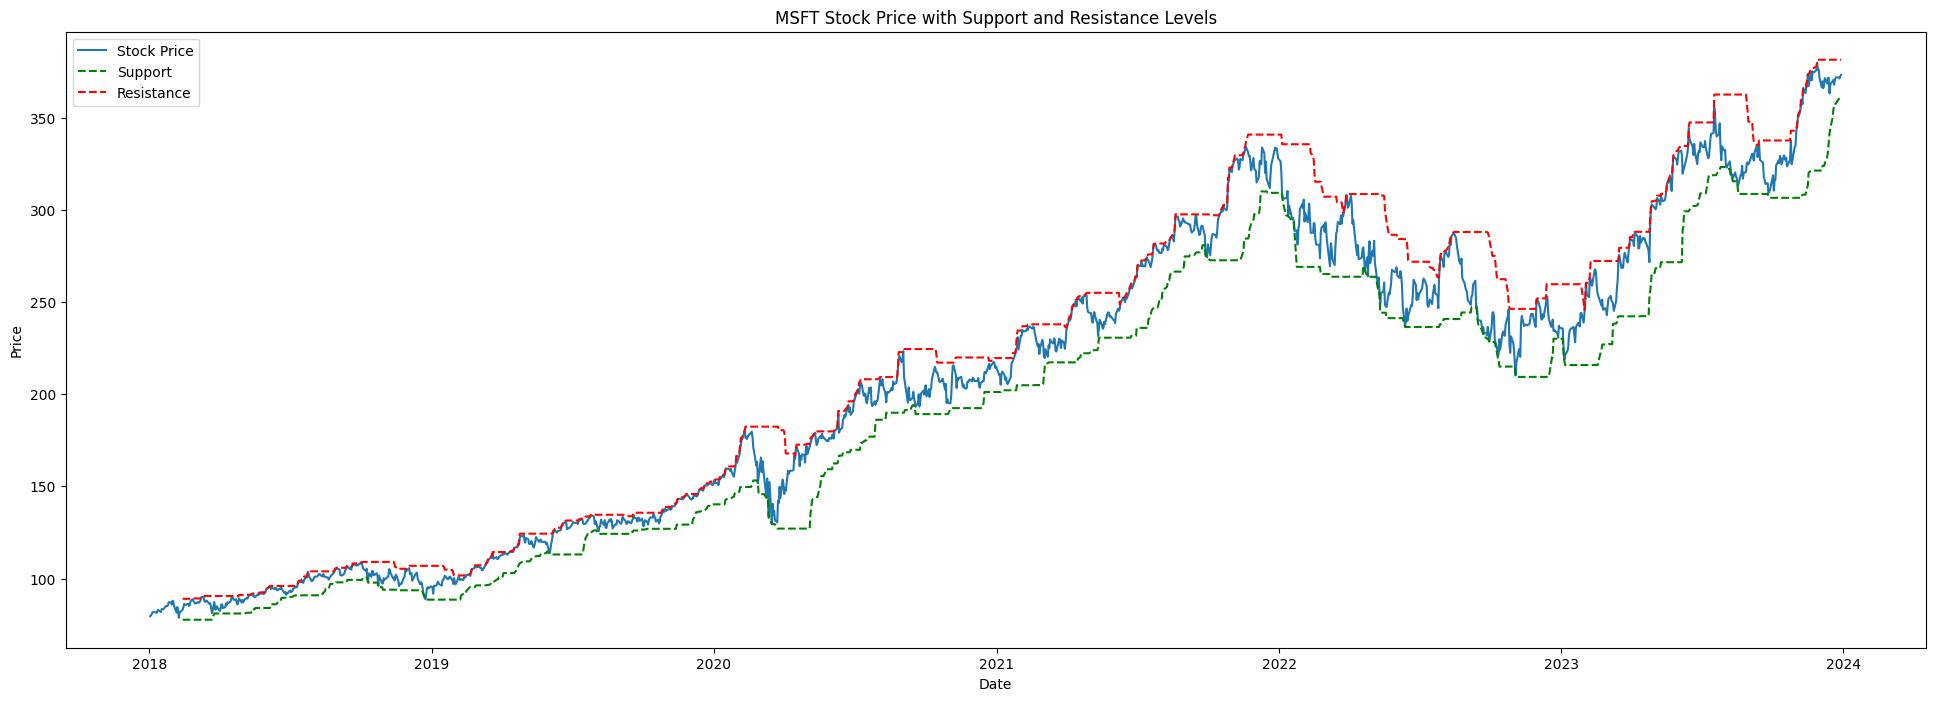

In [1]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

def find_levels(data, window):
    high = data['High'].rolling(window=window).max()
    low = data['Low'].rolling(window=window).min()
    midpoint = (high + low) / 2
    diff = high - low
    resistance = midpoint + (diff / 2)
    support = midpoint - (diff / 2)
    return support, resistance

# Download historical stock prices
symbol = "MSFT"
start_date = '2018-01-01'
end_date = '2023-12-30'
data = yf.download(symbol, start=start_date, end=end_date)

window = 30

# Calculate support and resistance levels
support, resistance = find_levels(data, window)

# Plot the stock price, support, and resistance lines
fig, ax = plt.subplots(figsize=(24, 8))
ax.plot(data.index, data['Close'], label='Stock Price')
ax.plot(data.index, support, label='Support', linestyle='--', color='green')
ax.plot(data.index, resistance, label='Resistance', linestyle='--', color='red')
ax.set_xlabel('Date')
ax.set_ylabel('Price')
ax.set_title(f'{symbol} Stock Price with Support and Resistance Levels')
ax.legend()

# Add annotations for last support and resistance levels
last_support = support.iloc[-1]
last_resistance = resistance.iloc[-1]
ax.annotate(f'Support: {last_support:.2f}', xy=(support.index[-1], last_support),
            xytext=(support.index[-1] - pd.DateOffset(days=30), last_support + 10),
            arrowprops=dict(facecolor='green', arrowstyle='->'))
ax.annotate(f'Resistance: {last_resistance:.2f}', xy=(resistance.index[-1], last_resistance),
            xytext=(resistance.index[-1] - pd.DateOffset(days=30), last_resistance - 10),
            arrowprops=dict(facecolor='red', arrowstyle='->'))

plt.show()

斐波那契回撤

[*********************100%***********************]  1 of 1 completed


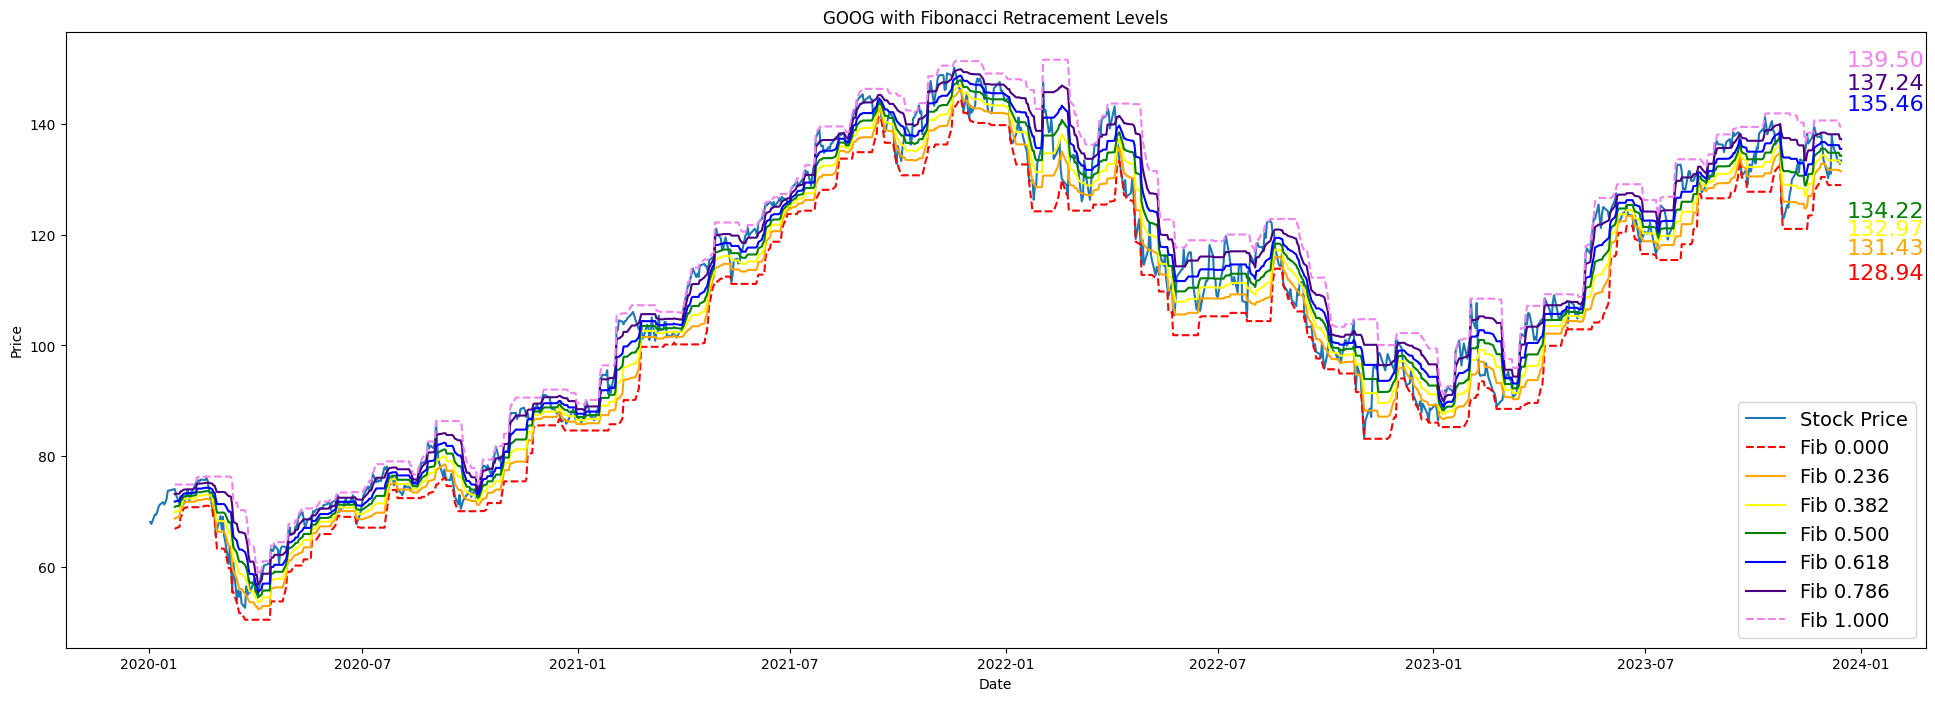

In [2]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Get the stock data for ASML.AS
symbol = "GOOG"
stock_data = yf.download(symbol, start="2020-01-01", end="2023-12-17")

# Define the lookback period for calculating high and low prices
lookback_period = 15

# Calculate the high and low prices over the lookback period
high_prices = stock_data["High"].rolling(window=lookback_period).max()
low_prices = stock_data["Low"].rolling(window=lookback_period).min()

# Calculate the price difference and Fibonacci levels
price_diff = high_prices - low_prices
levels = np.array([0, 0.236, 0.382, 0.5, 0.618, 0.786, 1])
fib_levels = low_prices.values.reshape(-1, 1) + price_diff.values.reshape(-1, 1) * levels

# Get the last price for each Fibonacci level
last_prices = fib_levels[-1, :]

# Define a color palette for the Fibonacci levels
colors = ['red', 'orange', 'yellow', 'green', 'blue', 'indigo', 'violet']

# Plot the stock price with the Fibonacci retracement levels and last prices
fig, ax = plt.subplots(figsize=(24,8))
ax.plot(stock_data.index, stock_data["Close"], label="Stock Price")

offsets = [-16, -14, -12, -10, 8, 10, 12]

for i, level in enumerate(levels):
    if level == 0 or level == 1:
        linestyle = "--"
    else:
        linestyle = "-"
    ax.plot(stock_data.index, fib_levels[:, i], label=f"Fib {level:.3f}", linestyle=linestyle, color=colors[i])
    ax.annotate(f"{last_prices[i]:.2f}",
                xy=(stock_data.index[-1], fib_levels[-1, i]),
                xytext=(stock_data.index[-1] + pd.Timedelta(days=5), fib_levels[-1, i] + offsets[i]),
                ha="left", va="center", fontsize=16, color=colors[i])

ax.set_xlabel("Date")
ax.set_ylabel("Price")
ax.set_title(f"{symbol} with Fibonacci Retracement Levels")
ax.legend(loc="lower right", fontsize=14)

plt.show()

波动高点和低点

In [3]:
import yfinance as yf
import pandas as pd
from scipy.signal import argrelextrema
import matplotlib.pyplot as plt

# Download stock data
symbol = "AAPL"
stock_data = yf.download(symbol, start="2020-01-01", end="2023-12-17")

# Identify local maxima (swing highs)
stock_data['Swing_High'] = stock_data['High'][argrelextrema(stock_data['High'].values, np.greater_equal, order=5)[0]]

# Identify local minima (swing lows)
stock_data['Swing_Low'] = stock_data['Low'][argrelextrema(stock_data['Low'].values, np.less_equal, order=5)[0]]

# Find last two non-NaN values for Swing Highs and Swing Lows
last_two_resistances = stock_data['Swing_High'].dropna().tail(2)
last_two_supports = stock_data['Swing_Low'].dropna().tail(2)

# Plotting
plt.figure(figsize=(24,8))
plt.plot(stock_data['Close'], label="Close Price")
plt.scatter(stock_data.index, stock_data['Swing_High'], color='r', label='Swing Highs', marker='o')
plt.scatter(stock_data.index, stock_data['Swing_Low'], color='g', label='Swing Lows', marker='o')

# Annotate the last two resistance and support prices
for date, price in last_two_resistances.items():
    plt.annotate(f"{price:.2f}", (date, price), textcoords="offset points", xytext=(10,10), ha='center', color='r')

for date, price in last_two_supports.items():
    plt.annotate(f"{price:.2f}", (date, price), textcoords="offset points", xytext=(10,-15), ha='center', color='g')

plt.title(f'{symbol} with Swing Highs & Lows')
plt.legend()
plt.show()

[*********************100%***********************]  1 of 1 completed


KeyError: "None of [Index([ 18,  28,  41,  70,  90,  99, 119, 132, 138, 169, 189, 197, 216, 250,\n       267, 278, 292, 302, 326, 333, 351, 386, 393, 409, 423, 460, 477, 491,\n       506, 531, 546, 565, 580, 589, 608, 625, 661, 678, 685, 696, 712, 724,\n       737, 743, 778, 787, 798, 810, 819, 829, 851, 861, 879, 891, 897, 924,\n       935, 951, 980, 995],\n      dtype='int64', name='Ticker')] are in the [columns]"

枢轴点分析

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf

def calculate_pivot_points(df):
    df['Pivot'] = (df['High'] + df['Low'] + df['Close']) / 3
    df['R1'] = 2 * df['Pivot'] - df['Low']
    df['S1'] = 2 * df['Pivot'] - df['High']
    df['R2'] = df['Pivot'] + (df['High'] - df['Low'])
    df['S2'] = df['Pivot'] - (df['High'] - df['Low'])
    return df

ticker = 'ASML'
start_date = '2023-01-01'
end_date = '2023-12-31'

data = yf.download(ticker, start=start_date, end=end_date)
df = calculate_pivot_points(data)
df = df.dropna()

fig, ax = plt.subplots(figsize=(30, 9))

ax.plot(df.index, df['Close'], label='Price', linewidth=2)
ax.plot(df.index, df['Pivot'], label='Pivot', linestyle='--', linewidth=1, color='black')
ax.plot(df.index, df['R1'], label='Resistance 1', linestyle='--', linewidth=1, color='red')
ax.plot(df.index, df['S1'], label='Support 1', linestyle='--', linewidth=1, color='green')
ax.plot(df.index, df['R2'], label='Resistance 2', linestyle='--', linewidth=1, color='orange')
ax.plot(df.index, df['S2'], label='Support 2', linestyle='--', linewidth=1, color='blue')

ax.set_title(f'{ticker} Stock Price with Pivot Points and Support/Resistance Levels')
ax.set_xlabel('Date')
ax.set_ylabel('Price')
ax.legend()

# Annotate prices for the last observation
last_date = df.index[-1]
points = {
    'Price': df['Close'].iloc[-1],
    'Pivot': df['Pivot'].iloc[-1],
    'R1': df['R1'].iloc[-1],
    'S1': df['S1'].iloc[-1],
    'R2': df['R2'].iloc[-1],
    'S2': df['S2'].iloc[-1],
}

colors = {
    'Price': 'blue',
    'Pivot': 'black',
    'R1': 'red',
    'S1': 'green',
    'R2': 'orange',
    'S2': 'blue'
}

sorted_points = sorted(points.items(), key=lambda x: x[1])

for i, (label, value) in enumerate(sorted_points):
    ax.annotate(f"{value:.2f}", xy=(last_date, value), xytext=(5, i * 15),
                textcoords="offset points", fontsize=15, ha='left', va='center', color=colors[label])

plt.show()

[*********************100%***********************]  1 of 1 completed


ValueError: Cannot set a DataFrame with multiple columns to the single column R1

K-均值价格聚类

[*********************100%***********************]  1 of 1 completed


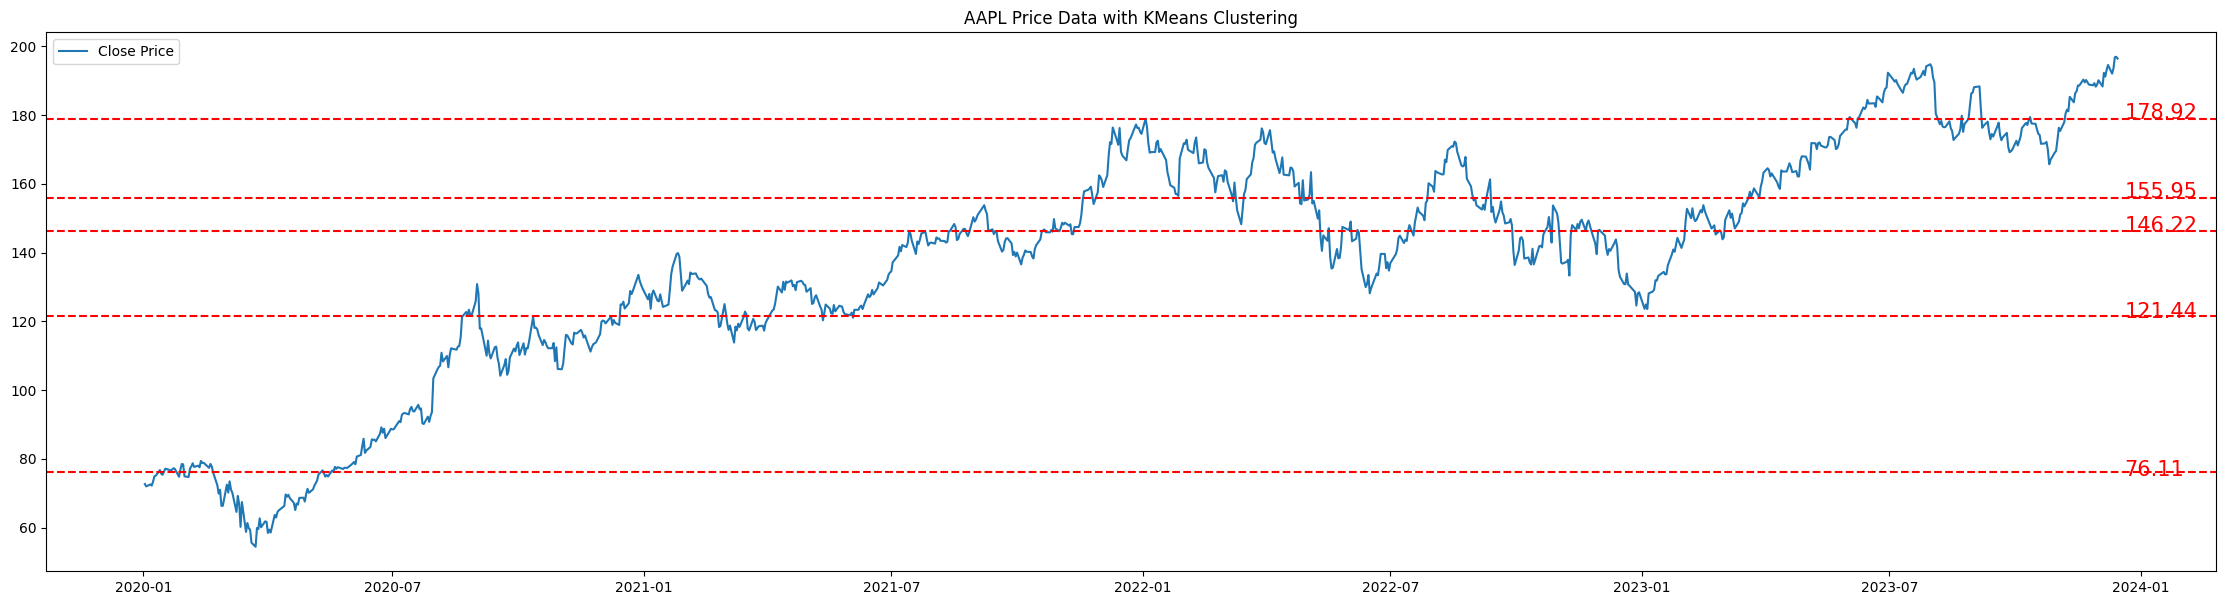

In [8]:
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Download stock data
symbol = "AAPL"
stock_data = yf.download(symbol, start="2020-01-01", end="2023-12-17")

# Preparing data for clustering: Normalize time and price to have similar scales
X_time = np.linspace(0, 1, len(stock_data)).reshape(-1, 1)
X_price = (stock_data['Close'].values - np.min(stock_data['Close'])) / (np.max(stock_data['Close']) - np.min(stock_data['Close']))
X_cluster = np.column_stack((X_time, X_price))

# Applying KMeans clustering
num_clusters = 5
kmeans = KMeans(n_clusters=num_clusters)
kmeans.fit(X_cluster)

# Extract cluster centers and rescale back to original price range
cluster_centers = kmeans.cluster_centers_[:, 1] * (np.max(stock_data['Close']) - np.min(stock_data['Close'])) + np.min(stock_data['Close'])

# Plotting
plt.figure(figsize=(28,7))
plt.plot(stock_data['Close'], label="Close Price")
for center in cluster_centers:
    plt.axhline(y=center, color='r', linestyle='--')
    plt.annotate(f"{center:.2f}", xy=(stock_data.index[-1], center * 1.01), xytext=(5,0), textcoords="offset points", fontsize=15, ha='left', va='center', color='r')

plt.title(f'{symbol} Price Data with KMeans Clustering')
plt.legend()
plt.show()

成交量分析器

In [9]:
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt

# Download stock data
symbol = "AAPL"
stock_data = yf.download(symbol, start="2020-01-01", end="2023-12-17")

# Calculate volume profile
price_bins = np.linspace(stock_data['Low'].min(), stock_data['High'].max(), 100)
volume_profile = []

for i in range(len(price_bins)-1):
    bin_mask = (stock_data['Close'] > price_bins[i]) & (stock_data['Close'] <= price_bins[i+1])
    volume_profile.append(stock_data['Volume'][bin_mask].sum())

# Estimating support and resistance
current_price = stock_data['Close'].iloc[-1]
support_idx = np.argmax(volume_profile[:np.digitize(current_price, price_bins)])
resistance_idx = np.argmax(volume_profile[np.digitize(current_price, price_bins):]) + np.digitize(current_price, price_bins)

support_price = price_bins[support_idx]
resistance_price = price_bins[resistance_idx]

# Plotting
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(20, 5), gridspec_kw={'width_ratios': [3, 1]})
ax1.plot(stock_data['Close'], label="Close Price")
ax1.axhline(y=support_price, color='g', linestyle='--', label='Support')
ax1.axhline(y=resistance_price, color='r', linestyle='--', label='Resistance')
ax1.legend()
ax1.set_title(f'{symbol} Price Data')
ax2.barh(price_bins[:-1], volume_profile, height=(price_bins[1] - price_bins[0]), color='blue', edgecolor='none')
ax2.set_title('Volume Profile')

plt.tight_layout()
plt.show()

print(f"Estimated Support Price: {support_price:.2f}")
print(f"Estimated Resistance Price: {resistance_price:.2f}")

[*********************100%***********************]  1 of 1 completed


ValueError: object too deep for desired array

线性和多项式回归

[*********************100%***********************]  1 of 1 completed


TypeError: unsupported format string passed to numpy.ndarray.__format__

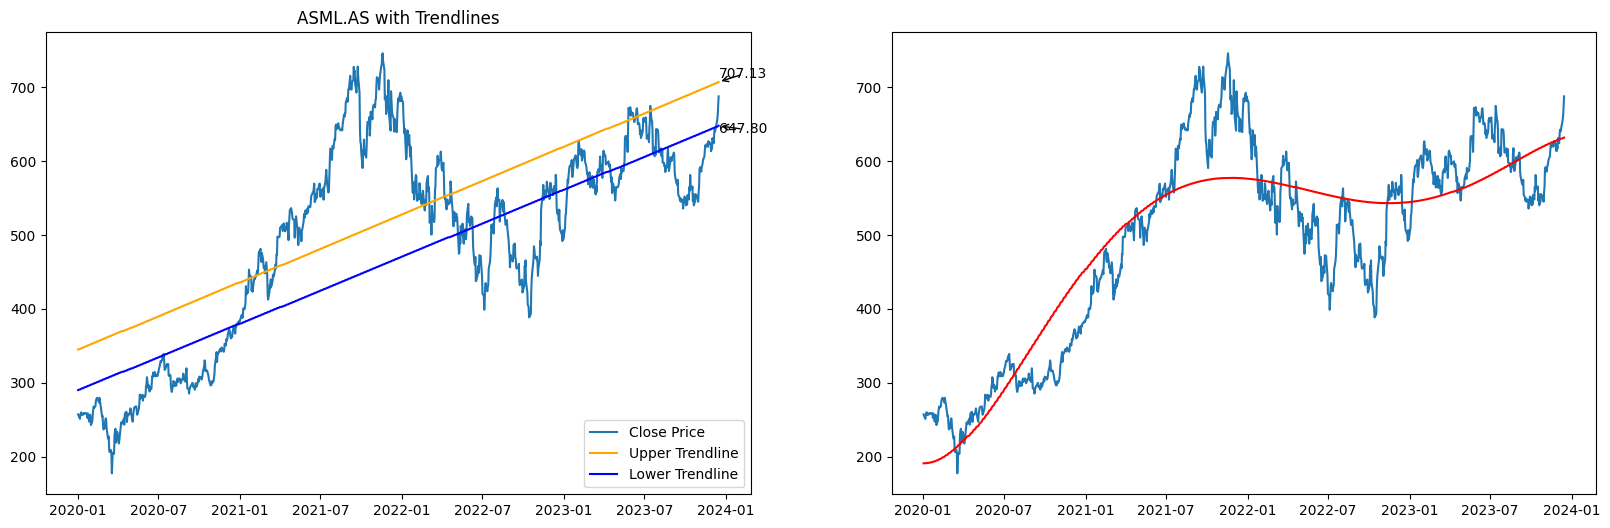

In [11]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import argrelextrema
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Specify the ticker
symbol = "ASML.AS"

# Download stock data
stock_data = yf.download(symbol, start="2020-01-01", end="2023-12-17")

# Identify local maxima (swing highs) and minima (swing lows)
swing_highs = argrelextrema(stock_data['High'].values, np.greater_equal, order=5)[0]
swing_lows = argrelextrema(stock_data['Low'].values, np.less_equal, order=5)[0]

# Linear regression for trendlines
upper_m, upper_b = np.polyfit(swing_highs, stock_data['High'].values[swing_highs], 1)
lower_m, lower_b = np.polyfit(swing_lows, stock_data['Low'].values[swing_lows], 1)

stock_data['Upper_Trendline'] = upper_m * np.arange(len(stock_data)) + upper_b
stock_data['Lower_Trendline'] = lower_m * np.arange(len(stock_data)) + lower_b

# Preparing data for polynomial regression
X = np.array(range(len(stock_data))).reshape(-1, 1)
y = stock_data['Close'].values

# Polynomial regression
poly = PolynomialFeatures(degree=5)
X_poly = poly.fit_transform(X)
poly_regressor = LinearRegression()
poly_regressor.fit(X_poly, y)
y_pred = poly_regressor.predict(X_poly)

# Plotting
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,6))
ax1.plot(stock_data['Close'], label="Close Price")
ax1.plot(stock_data['Upper_Trendline'], label="Upper Trendline", color="orange")
ax1.plot(stock_data['Lower_Trendline'], label="Lower Trendline", color="blue")

# Annotate last prices for Trendlines
ax1.annotate(f"{stock_data['Upper_Trendline'].iloc[-1]:.2f}",
             xy=(stock_data.index[-1], stock_data['Upper_Trendline'].iloc[-1]),
             xytext=(stock_data.index[-1], stock_data['Upper_Trendline'].iloc[-1] + 5),
             arrowprops=dict(arrowstyle='->'))

ax1.annotate(f"{stock_data['Lower_Trendline'].iloc[-1]:.2f}",
             xy=(stock_data.index[-1], stock_data['Lower_Trendline'].iloc[-1]),
             xytext=(stock_data.index[-1], stock_data['Lower_Trendline'].iloc[-1] - 10),
             arrowprops=dict(arrowstyle='->'))

ax1.set_title(f'{symbol} with Trendlines')
ax1.legend(loc = "lower right")

ax2.plot(stock_data['Close'], label="Close Price")
ax2.plot(stock_data.index, y_pred, color='r', label="Polynomial Support/Resistance")

# Annotate last price for Polynomial Regression
ax2.annotate(f"{y_pred[-1]:.2f}",
             xy=(stock_data.index[-1], y_pred[-1]),
             xytext=(stock_data.index[-1], y_pred[-1] + 5),
             arrowprops=dict(arrowstyle='->'))

ax2.set_title(f'{symbol} Price Data with Polynomial Regression')
ax2.legend()

plt.tight_layout()
plt.show()